# Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, mutual_info_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

### K-means Clustering


For more information on the K-means Clustering, see the document [here](https://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/Clustering.pdf).


In [3]:
dataset = load_iris()

X = dataset.data
y = dataset.target

In [4]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [5]:
print(dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(X_scaled)

KMeans(max_iter=500, n_clusters=3)

In [7]:
feature_names = dataset.feature_names
predicted_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Silhouette Score:", silhouette_score(X_scaled, predicted_labels))

# since true class labels are given
print("Mutual Information Score:", mutual_info_score(y, predicted_labels))

Silhouette Score: 0.4630420362927048
Mutual Information Score: 0.7044862220255494


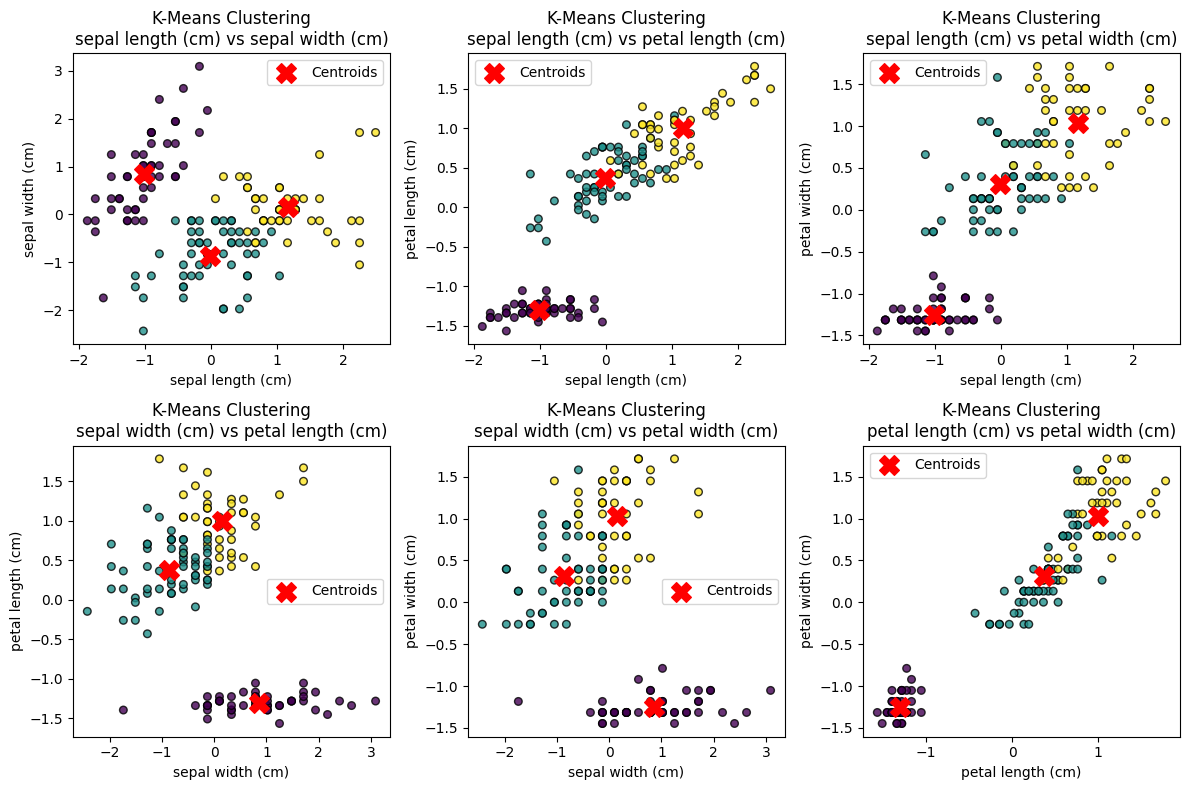

In [9]:
plt.figure(figsize=(12, 8))

# Plot pairs of features 
subplot_idx = 1
for i in range(len(feature_names) - 1):
    for j in range(i + 1, len(feature_names)):
        plt.subplot(2, 3, subplot_idx)
        plt.scatter(X_scaled[:, i], X_scaled[:, j], c=predicted_labels, cmap='viridis', edgecolors='k', s=30, alpha=0.8) 
        plt.scatter(centroids[:, i], centroids[:, j], c='red', marker='X', s=200, label='Centroids')
        plt.title(f'K-Means Clustering\n{feature_names[i]} vs {feature_names[j]}')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        subplot_idx += 1
plt.tight_layout()
plt.show()

Let's use the penguin dataset given in [Kaggle](https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species) with K-means clustering.

In [3]:
penguin_dataset = pd.read_csv("./datasets/penguins.csv")
display(penguin_dataset.head())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
print(penguin_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


In [5]:
print(penguin_dataset.isna().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [6]:
penguin_dataset = penguin_dataset.dropna()

display(penguin_dataset.head())
print(penguin_dataset.info())
print(penguin_dataset.isna().sum())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB
None
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [7]:
penguin_dataset = pd.get_dummies(penguin_dataset, drop_first=True, dtype=int)
display(penguin_dataset.head())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [8]:
display(penguin_dataset.describe())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104,0.492537,0.504478
std,5.453430,1.971966,263.253508,803.633495,0.500692,0.500728
min,32.100000,13.100000,-132.000000,2700.000000,0.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,0.000000,1.000000
75%,48.550000,18.700000,213.000000,4787.500000,1.000000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000,1.000000


Since there are some outliers, let's remove those outliers.

In [9]:
Q1 = penguin_dataset.quantile(0.25)
Q3 = penguin_dataset.quantile(0.75)
IQR = Q3 - Q1
iqr_threshold = 1.5

In [10]:
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR

outliers_count = ((penguin_dataset < lower_bound) | (penguin_dataset > upper_bound)).sum()

print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    2
body_mass_g          0
sex_FEMALE           0
sex_MALE             0
dtype: int64


In [11]:
# remove outliers
outlier_rows = ((penguin_dataset < (lower_bound)) | (penguin_dataset > (upper_bound))).any(axis=1)
penguin_dataset = penguin_dataset[~outlier_rows]

In [12]:
# standardize the data
scalar = StandardScaler()
penguin_dataset_scaled = scalar.fit_transform(penguin_dataset)

In [13]:
penguin_dataset_scaled = pd.DataFrame(penguin_dataset_scaled, columns=penguin_dataset.columns)
display(penguin_dataset_scaled.head())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


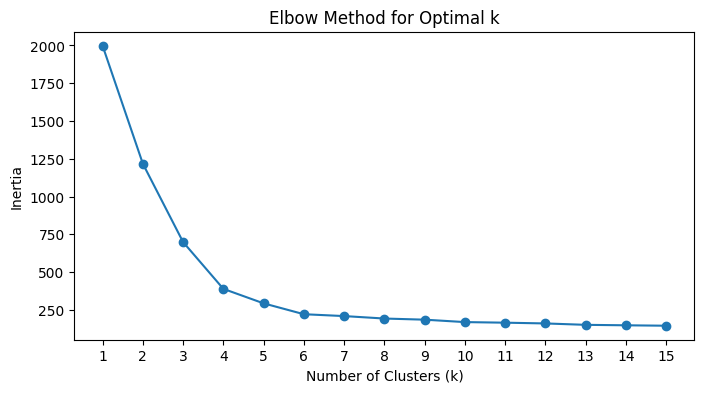

In [14]:
# find the optimum number of clusters.

inertias = []
n_clusters_arr = np.arange(1, 16, 1)

for k in n_clusters_arr:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42) 
    kmeans.fit(penguin_dataset_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(n_clusters_arr, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.xticks(n_clusters_arr)
plt.ylabel('Inertia')
plt.show()

Therefore let's select 4 as the optimum number of clusters.

In [15]:
kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42) 
kmeans.fit(penguin_dataset_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [16]:
feature_names = penguin_dataset_scaled.columns
predicted_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(feature_names)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')


In [17]:
print("Silhouette Score:", silhouette_score(penguin_dataset_scaled, predicted_labels))

Silhouette Score: 0.5715457822588101


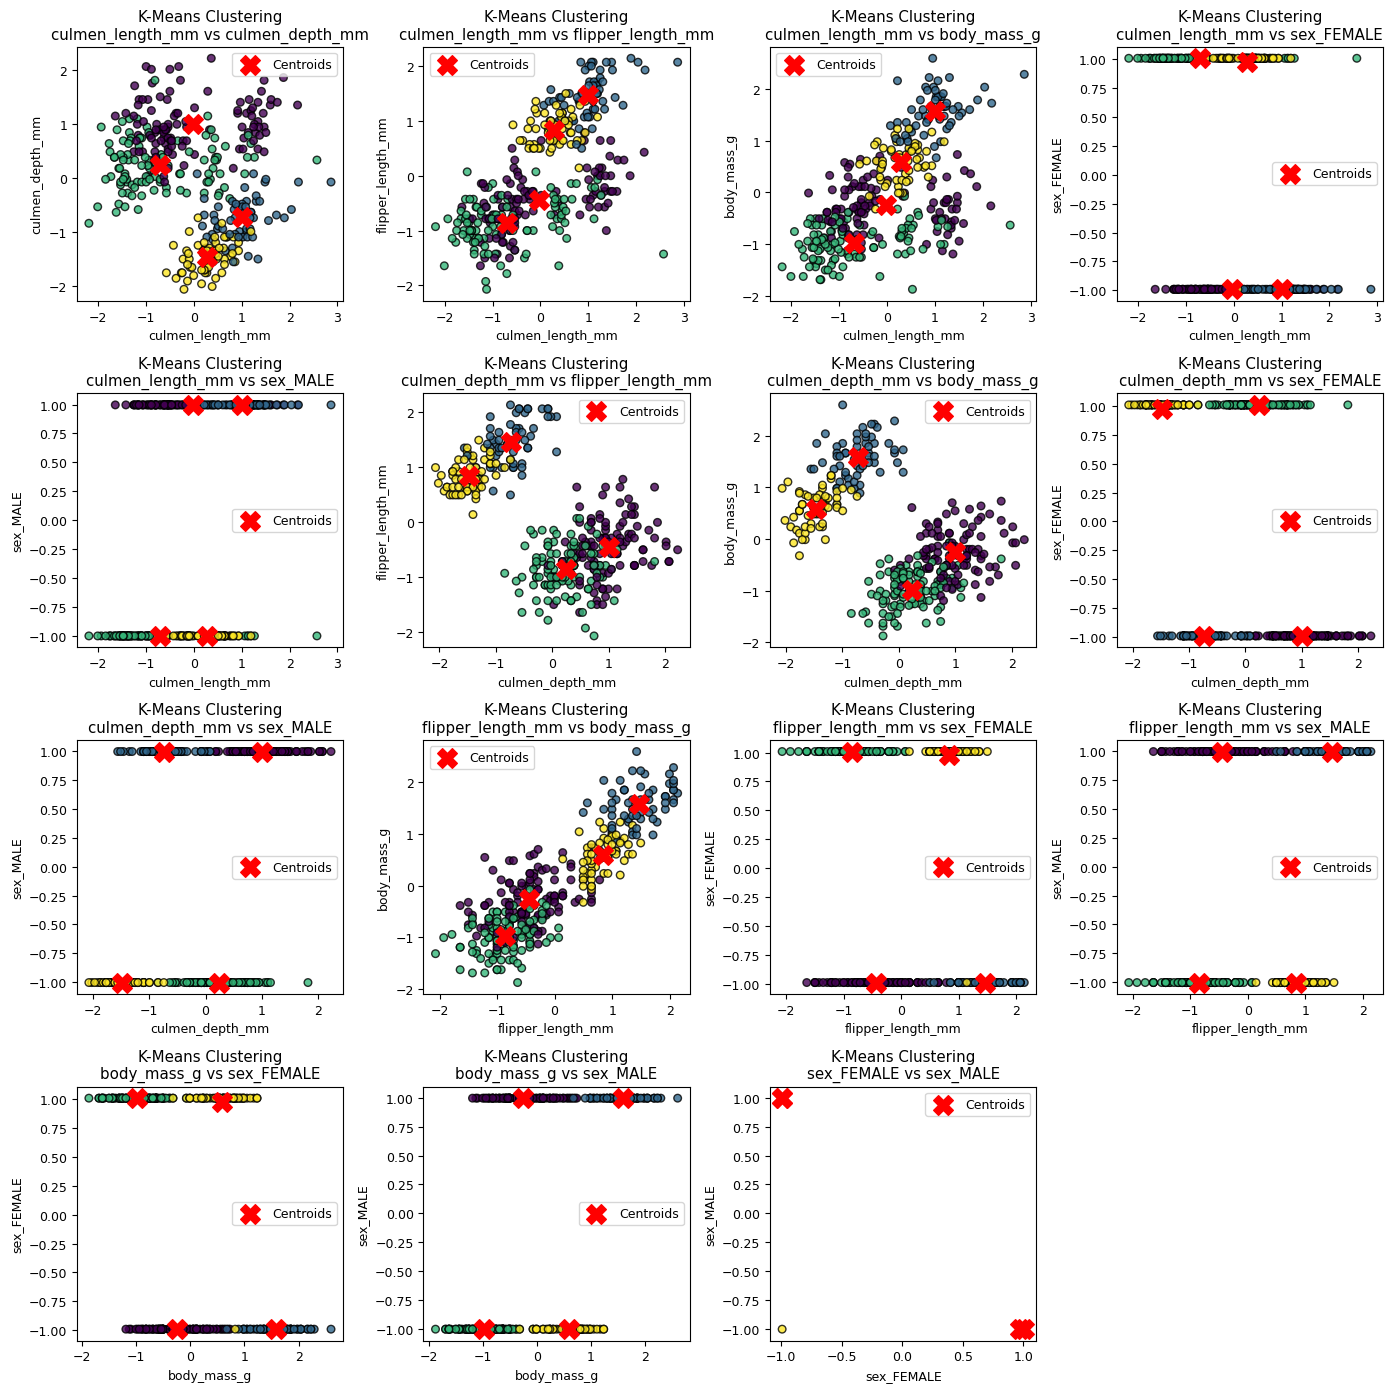

In [18]:
# Reduce font size globally
mpl.rcParams['font.size'] = 9

plt.figure(figsize=(14, 14))
subplot_idx = 1
for i in range(len(feature_names) - 1):
    for j in range(i + 1, len(feature_names)):
        plt.subplot(4, 4, subplot_idx)
        plt.scatter(penguin_dataset_scaled.iloc[:, i], penguin_dataset_scaled.iloc[:, j], 
                    c=predicted_labels, cmap='viridis', edgecolors='k', s=30, alpha=0.8) 
        plt.scatter(centroids[:, i], centroids[:, j], c='red', marker='X', s=200, label='Centroids')
        plt.title(f'K-Means Clustering\n{feature_names[i]} vs {feature_names[j]}')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        subplot_idx += 1
plt.tight_layout()
plt.show()

### Gaussian Mixture Model (GMM)

The K-means algorithm does an excellent job when clusters are well separated and more or less spherical, but not when the clusters overlap. GMM algorithms compute a "soft," probabilistic clustering which allows the algorithm to better handle overlapping clusters. Finally, the GMM model is probabilistic, and so it can be used to learn probability distributions from data. For more information on the GMM, see the document [here](https://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/Clustering.pdf).

In [3]:
dataset = load_iris()

X = dataset.data
y = dataset.target

In [4]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
gmm = GaussianMixture(n_components=3, random_state=42, max_iter=500)
gmm.fit(X_train)

GaussianMixture(max_iter=500, n_components=3, random_state=42)

In [7]:
feature_names = dataset.feature_names
predicted_labels = gmm.predict(X_test)
means = gmm.means_

print(means)

[[6.52370413 2.97420945 5.50075773 1.97916406]
 [4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.84829114 2.71775848 4.15728674 1.27738008]]


In [8]:
print("Silhouette Score:", silhouette_score(X_test, predicted_labels))

# since true class labels are given
print("Mutual Information Score:", mutual_info_score(y_test, predicted_labels))

Silhouette Score: 0.5197907743524384
Mutual Information Score: 1.001429492753076


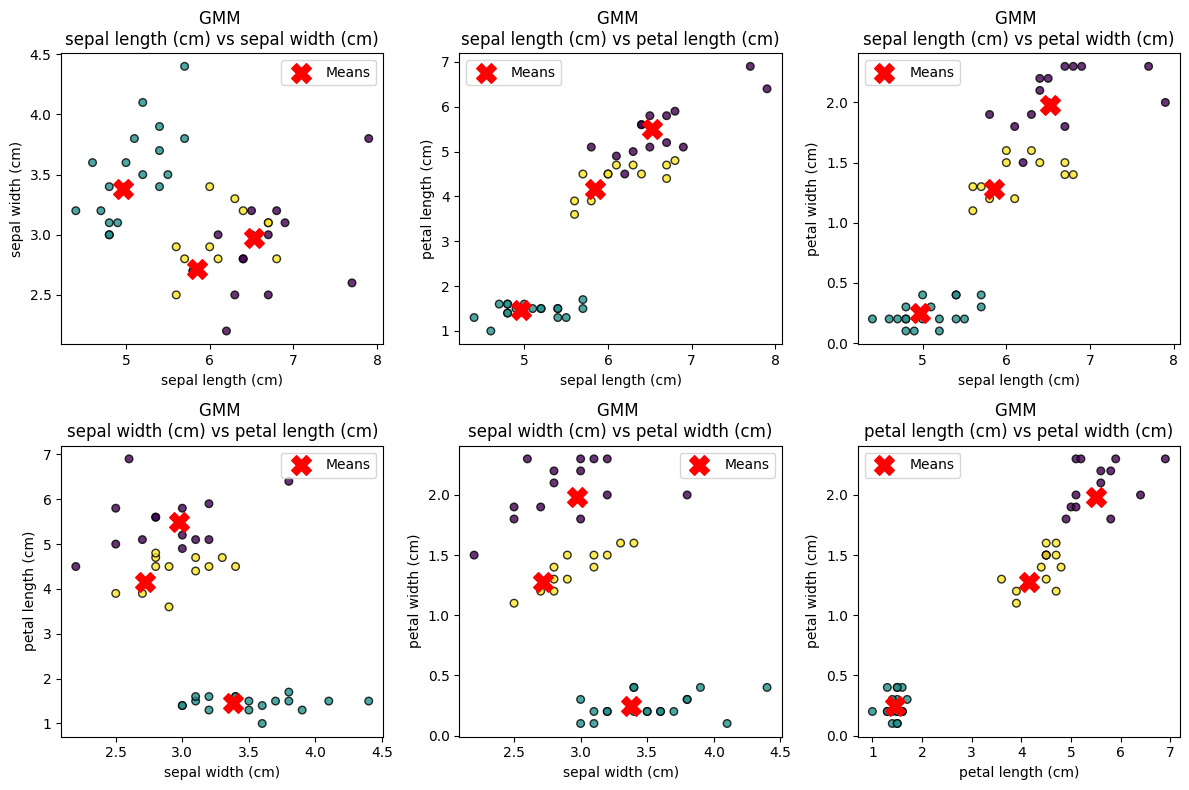

In [9]:
plt.figure(figsize=(12, 8))

# Plot pairs of features 
subplot_idx = 1
for i in range(len(feature_names) - 1):
    for j in range(i + 1, len(feature_names)):
        plt.subplot(2, 3, subplot_idx)
        plt.scatter(X_test[:, i], X_test[:, j], c=predicted_labels, cmap='viridis', edgecolors='k', s=30, alpha=0.8) 
        plt.scatter(means[:, i], means[:, j], c='red', marker='X', s=200, label='Means')
        plt.title(f'GMM \n{feature_names[i]} vs {feature_names[j]}')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        subplot_idx += 1
plt.tight_layout()
plt.show()

Let's use the penguin dataset given in [Kaggle](https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species) with GMM.

In [3]:
penguin_dataset = pd.read_csv("./datasets/penguins.csv")
penguin_dataset = penguin_dataset.dropna()
penguin_dataset = pd.get_dummies(penguin_dataset, drop_first=True, dtype=int)

# remove outliers
Q1 = penguin_dataset.quantile(0.25)
Q3 = penguin_dataset.quantile(0.75)
IQR = Q3 - Q1
iqr_threshold = 1.5
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR
outlier_rows = ((penguin_dataset < (lower_bound)) | (penguin_dataset > (upper_bound))).any(axis=1)
penguin_dataset = penguin_dataset[~outlier_rows]

# standardizing
scalar = StandardScaler()
penguin_dataset_scaled = scalar.fit_transform(penguin_dataset)

penguin_dataset_scaled = pd.DataFrame(penguin_dataset_scaled, columns=penguin_dataset.columns)
display(penguin_dataset_scaled.head())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [4]:
gmm = GaussianMixture(n_components=4, random_state=42, max_iter=500)
gmm.fit(penguin_dataset_scaled)

GaussianMixture(max_iter=500, n_components=4, random_state=42)

In [5]:
feature_names = penguin_dataset_scaled.columns
predicted_labels = gmm.predict(penguin_dataset_scaled)
means = gmm.means_

print(means)

[[-0.02652997  1.00341238 -0.44645665 -0.25085357 -0.99103121  0.99700149]
 [ 1.00278265 -0.73140098  1.46328161  1.58598876 -0.99103121  0.99700149]
 [-0.69990367  0.23648614 -0.85422747 -0.98081017  1.00904996 -1.00300753]
 [ 0.28020692 -1.47543058  0.83841886  0.58969481  0.97515027 -1.00300753]]


In [6]:
print("Silhouette Score:", silhouette_score(penguin_dataset_scaled, predicted_labels))

Silhouette Score: 0.5715457822588101


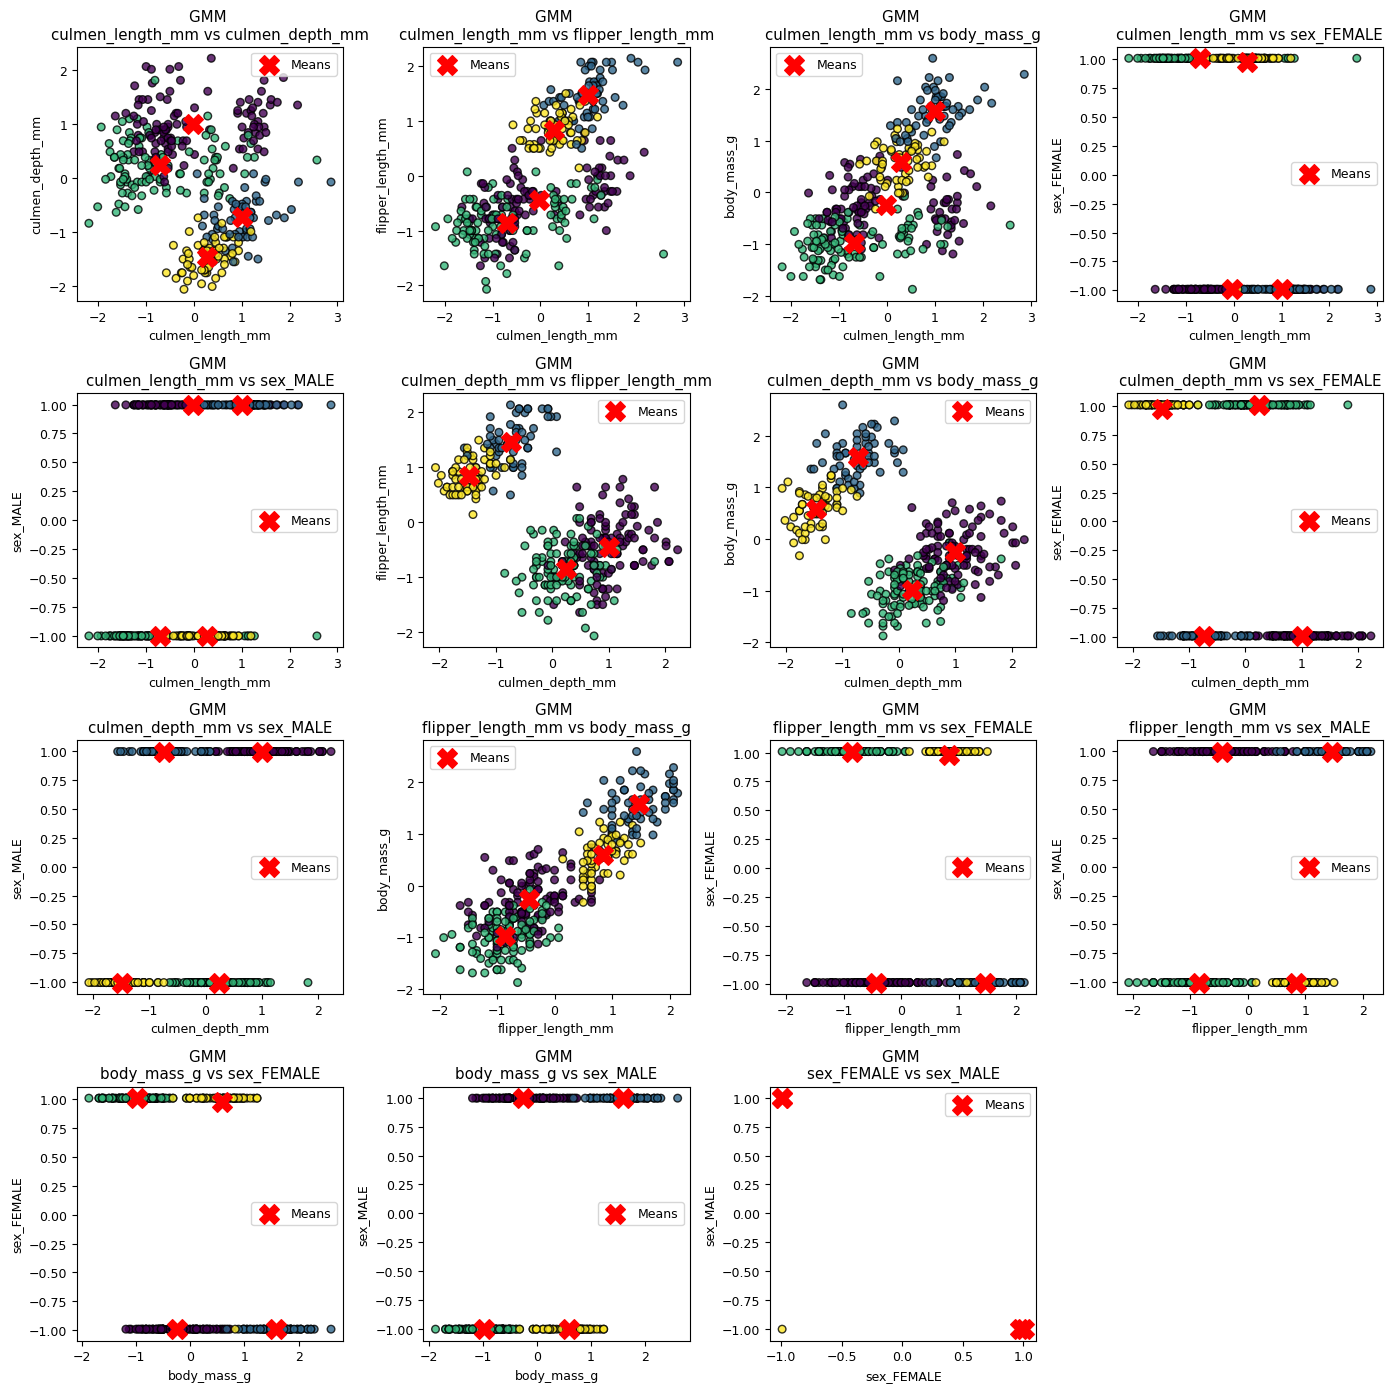

In [7]:
# Reduce font size globally
mpl.rcParams['font.size'] = 9

plt.figure(figsize=(14, 14))
subplot_idx = 1
for i in range(len(feature_names) - 1):
    for j in range(i + 1, len(feature_names)):
        plt.subplot(4, 4, subplot_idx)
        plt.scatter(penguin_dataset_scaled.iloc[:, i], penguin_dataset_scaled.iloc[:, j], 
                    c=predicted_labels, cmap='viridis', edgecolors='k', s=30, alpha=0.8) 
        plt.scatter(means[:, i], means[:, j], c='red', marker='X', s=200, label='Means')
        plt.title(f'GMM \n{feature_names[i]} vs {feature_names[j]}')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        subplot_idx += 1
plt.tight_layout()
plt.show()